In [ ]:
#For this homework, use following data. Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#The Lead dataset is designed for a binary classification task,
#where the target variable is Converted (indicating whether a lead converted to customer, with values 0 or 1).
#The other columns are features that describe the lead's characteristics, behavior, and interactions.
#The explanation of the columns are given below.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

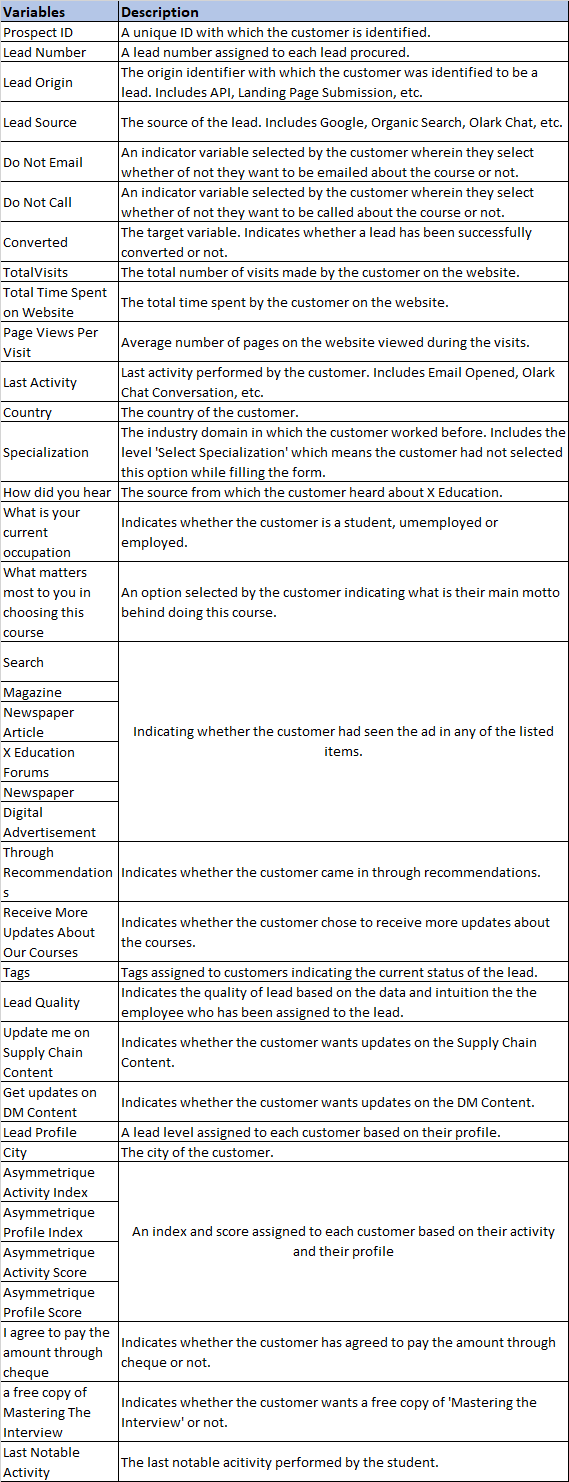

In [5]:
#Q1 (15 pt) -There are missing values in the Lead data.
#Replace missing values with the mean if the variable is numeric and  with the mode if the variable is categorical.
#Note: If the data type (Dtype) is object, the variable is categorical and
#if the data type (Dtype) is int64 or float64, the variable is numerical.
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')

for column in df.columns:
    if df[column].isnull().sum() > 0:

        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].mean(), inplace=True)

        elif df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)

print(df.isnull().sum().sort_values(ascending=False).head())


Prospect ID     0
Lead Number     0
Lead Origin     0
Lead Source     0
Do Not Email    0
dtype: int64


<ipython-input-5-697b6cf299d3>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-5-697b6cf299d3>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

Label encoding is a technique used in machine learning to convert categorical data into numerical format. Each unique category value is assigned an integer value. For example, if you have a categorical feature like "color" with values "red," "green," and "blue," label encoding might transform these into 0, 1, and 2, respectively. This is useful because many machine learning algorithms require numerical input. However, it can imply an ordinal relationship where none exists, which might not be appropriate for all datasets.

When to Use

Use label encoding for ordinal data or tree-based models.

Use dummy variables for nominal data or models sensitive to ordinal assumptions such as linear regression

In [7]:
#Q2-(15 pt)Convert categorical variables to numerical with label encoder method .
#Drop Prospect ID,	Lead Number  and Converted from the input variables and use Converted as target variables.
#Split data into train and test using 30% of the data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


X = df.drop(['Prospect ID', 'Lead Number', 'Converted'], axis=1)
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (6468, 34)
Test set shape: (2772, 34)


In [ ]:
#Q3(10 pt) Assuming Converted = 1 represents the positive case (i.e., a lead converts into a customer),
# define what is false positive and false negative in this dataset?
#Which one is more important  metric (precison or recall) in this case? Why?
In this dataset, a false positive means predicting a lead
will convert when it actually doesn’t, while a false negative means
predicting a lead won’t convert when it actually does.
Missing out on a potential customer (false negative) is more
harmful to the business than following up with an uninterested lead.
Therefore, recall is the more important metric here, as it ensures we capture as
 many real customers as possible.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:37:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2484, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 6468, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384045 -> initscore=-0.472416
[LightGBM] [Info] Start training from score -0.472416


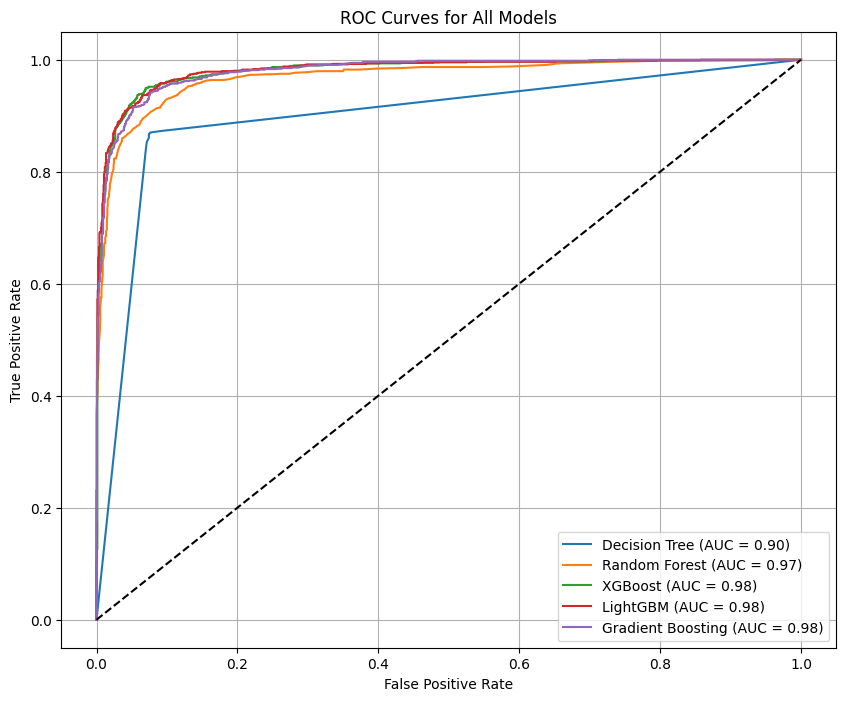


Model: Decision Tree
Accuracy: 0.9030
Precision: 0.8811
Recall: 0.8672
AUC Score: 0.8987
Confusion Matrix:
[[1569  126]
 [ 143  934]]

Model: Random Forest
Accuracy: 0.9203
Precision: 0.9196
Recall: 0.8709
AUC Score: 0.9699
Confusion Matrix:
[[1613   82]
 [ 139  938]]

Model: XGBoost
Accuracy: 0.9376
Precision: 0.9297
Recall: 0.9081
AUC Score: 0.9810
Confusion Matrix:
[[1621   74]
 [  99  978]]

Model: LightGBM
Accuracy: 0.9387
Precision: 0.9315
Recall: 0.9090
AUC Score: 0.9822
Confusion Matrix:
[[1623   72]
 [  98  979]]

Model: Gradient Boosting
Accuracy: 0.9315
Precision: 0.9302
Recall: 0.8904
AUC Score: 0.9802
Confusion Matrix:
[[1623   72]
 [ 118  959]]


In [8]:
#Q4(60 pt)Use decison tree, random forest and boosting methods (XGBoost, LightGBM, GradingBoosting Method) to get
# the accuracy scores,precison and recall  on test  data.
# Report confusion metrics as well for these methods on test  data.
# Get the AUC score for this methods and draw ROC curve on test  data. .
#Which methods gave  best performance on test data based on accuracy metric,precison, recall metric and AUC soore?
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


results = {}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'AUC': auc,
        'Confusion Matrix': cm
    }

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Display metrics
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"AUC Score: {metrics['AUC']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
